## Desafio Aprendizagem Supervisionada

### Desafio
- Link:  (referência: https://www.kaggle.com/datasets/jacksondivakarr/phone-classification-dataset/data)
  
- Descrição: Uma coleção de características que caracterizam telefones celulares, incluindo potência da bateria, especificações da câmera, suporte de rede, memória, dimensões da tela e outros atributos. A coluna 'faixa_de_preço' categoriza os telefones em faixas de preço, tornando este conjunto de dados adequado para tarefas de classificação de telefones celulares e previsão de preço.

- Problema de Negócio: Sua empresa precisa de um sistema inteligente que defina qual será a faixa de preço para uma lista de novos produtos que serão lançados ao longo do ano.
  
- Desafio: Imagine que você foi responsável por essa tarefa e precisa especificar quais serão as faixas de preço desses novos produtos. Para isso, você decidiu construir um classificador (a coluna faixa_de_preço é composta pelas categorias de preço 0, 1, 2, 3). Escolha o melhor algoritmo e explore os melhores resultados

- Sugestão extra: Publique esse desafio no seu Git Hub e poste no seu Linkedin.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# link do git
df = pd.read_csv("../bases/phone/dataset1.csv")
df

,potência_da_bateria,bluetooth,velocidade_do_processador,dual_sim,megapixels_câmera_frontal,4G,memória_interna,profundidade_móvel,peso_do_dispositivo,núcleos_do_processador,...,altura_do_pixel,largura_do_pixel,RAM,altura_da_tela,largura_da_tela,tempo_de_conversação,3G,tela_touch,wi-fi,faixa_de_preço
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   potência_da_bateria          2000 non-null   int64  
 1   bluetooth                    2000 non-null   int64  
 2   velocidade_do_processador    2000 non-null   float64
 3   dual_sim                     2000 non-null   int64  
 4   megapixels_câmera_frontal    2000 non-null   int64  
 5   4G                           2000 non-null   int64  
 6   memória_interna              2000 non-null   int64  
 7   profundidade_móvel           2000 non-null   float64
 8   peso_do_dispositivo          2000 non-null   int64  
 9   núcleos_do_processador       2000 non-null   int64  
 10  megapixels_câmera_principal  2000 non-null   int64  
 11  altura_do_pixel              2000 non-null   int64  
 12  largura_do_pixel             2000 non-null   int64  
 13  RAM               

In [4]:
df.sample(10)

,potência_da_bateria,bluetooth,velocidade_do_processador,dual_sim,megapixels_câmera_frontal,4G,memória_interna,profundidade_móvel,peso_do_dispositivo,núcleos_do_processador,...,altura_do_pixel,largura_do_pixel,RAM,altura_da_tela,largura_da_tela,tempo_de_conversação,3G,tela_touch,wi-fi,faixa_de_preço
528,1671,0,0.6,1,7,1,61,0.1,129,2,...,263,848,2336,10,4,7,1,0,0,2
687,768,0,0.5,1,0,0,19,0.9,159,2,...,637,991,1145,19,1,7,0,0,1,0
797,1320,0,2.1,1,0,1,41,0.6,144,7,...,123,1229,542,11,1,14,1,1,0,0
1265,503,1,1.8,1,1,1,13,0.7,131,1,...,1495,1688,3117,19,6,9,1,0,1,3
1925,1830,1,0.5,0,5,0,14,0.8,160,6,...,773,1353,1905,16,3,19,1,1,1,2
1929,1602,0,1.6,1,0,1,35,0.1,99,7,...,1325,1800,1829,18,17,13,1,0,0,2
1800,1358,0,1.7,0,0,0,60,0.6,147,3,...,889,1635,440,14,10,13,1,0,0,0
1620,623,0,1.4,1,0,1,15,0.2,189,3,...,778,844,3510,14,4,18,1,0,1,2
1067,1703,1,0.5,0,5,1,23,0.2,92,6,...,134,521,793,7,3,17,1,1,0,0
576,587,1,2.3,1,4,0,6,0.7,170,1,...,612,1793,2777,9,2,14,1,1,0,2


---

In [5]:
X = df.drop(columns=['faixa_de_preço'], axis=1)
y = df['faixa_de_preço']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [7]:
acc = []

-------

In [8]:
clf_svm = SVC()
clf_svm.fit(X_train, y_train)
y_pred = clf_svm.predict(X_test)

In [9]:
acc.append(accuracy_score(y_test, y_pred))
print (acc[0])

0.9666666666666667


In [10]:
confusion_matrix(y_test, y_pred)

array([[148,   2,   0,   0],
       [  3, 146,   1,   0],
       [  0,   6, 140,   4],
       [  0,   0,   4, 146]])

---

In [11]:
clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)

y_pred = clf_lr.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
acc.append(accuracy_score(y_test, y_pred))
print (acc[1])

0.6333333333333333


In [13]:
confusion_matrix(y_test, y_pred)

array([[118,  30,   2,   0],
       [ 25,  82,  34,   9],
       [  0,  33,  70,  47],
       [  0,   0,  40, 110]])

-----

In [14]:
clf_tree = DecisionTreeClassifier()
clf_tree.fit(X_train, y_train)

y_pred = clf_tree.predict(X_test)

In [15]:
acc.append(accuracy_score(y_test, y_pred))
print (acc[2])

0.8116666666666666


In [16]:
confusion_matrix(y_test, y_pred)

array([[138,  12,   0,   0],
       [ 18, 116,  16,   0],
       [  0,  27, 108,  15],
       [  0,   0,  25, 125]])

-----

In [17]:
clf_rf = RandomForestClassifier(n_estimators=30)
clf_rf.fit(X_train, y_train)

y_pred = clf_rf.predict(X_test)

In [18]:
acc.append(accuracy_score(y_test, y_pred))
print (acc[3])

0.8616666666666667


In [19]:
confusion_matrix(y_test, y_pred)

array([[137,  13,   0,   0],
       [ 13, 126,  11,   0],
       [  0,  19, 116,  15],
       [  0,   0,  12, 138]])

----

In [20]:
clf_knn = KNeighborsClassifier(n_neighbors=10)
clf_knn.fit(X_train, y_train)

y_pred = clf_knn.predict(X_test)

In [21]:
acc.append(accuracy_score(y_test, y_pred))
print (acc[4])

0.93


In [22]:
confusion_matrix(y_test, y_pred)

array([[148,   2,   0,   0],
       [  9, 137,   4,   0],
       [  0,  13, 137,   0],
       [  0,   0,  14, 136]])

----

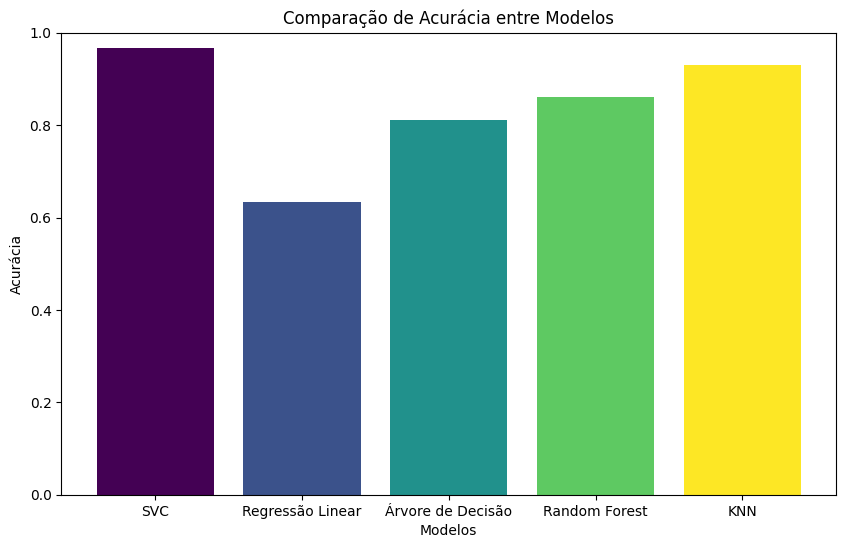

In [24]:
import matplotlib.pyplot as plt

# Lista de acurácias para comparar
modelos = ['SVC', 'Regressão Linear', 'Árvore de Decisão', 'Random Forest', 'KNN']

# Criar uma paleta de cores para as barras
cores = plt.cm.viridis(np.linspace(0, 1, len(modelos)))

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(modelos, acc, color=cores)
plt.xlabel('Modelos')
plt.ylabel('Acurácia')
plt.title('Comparação de Acurácia entre Modelos')
plt.ylim(0, 1)  # Definir o intervalo do eixo y de 0 a 1 (considerando que a acurácia está entre 0 e 1)
plt.show()

----

Extra: Teste com  as amostras padronizadas via StandardScaler